In [7]:
#!pip install kaggle

In [8]:
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

In [9]:
#!kaggle datasets download -d muhammetvarl/laptop-price

In [10]:
#!unzip laptop-price.zip

In [39]:
import pandas as pd

df = pd.read_csv('laptop_price.csv', encoding='latin1')

In [40]:
df = df.drop("Product", axis=1)
df.head(5)


,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [41]:
df = df.join(pd.get_dummies(df['Company']))
df = df.drop('Company', axis = 1)


In [42]:
df = df.join(pd.get_dummies(df['TypeName']))
df = df.drop('TypeName', axis = 1)
df.head(5)

,laptop_ID,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,1,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,False,False,False,False,False,False,False,False,True,False
1,2,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,...,False,False,False,False,False,False,False,False,True,False
2,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,...,False,False,False,False,False,False,False,True,False,False
3,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,...,False,False,False,False,False,False,False,False,True,False
4,5,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,...,False,False,False,False,False,False,False,False,True,False


In [15]:
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
df["Screen width"] = df.ScreenResolution.str.split("x").apply(lambda x: x[0])
df["Screen height"] = df.ScreenResolution.str.split("x").apply(lambda x: x[1])
df = df.drop("ScreenResolution", axis = 1)

In [16]:
df["Cpu Brand"] = df.Cpu.str.split(" ").apply(lambda x: x[0])
df["Cpu Frequency"] = df.Cpu.str.split(" ").apply(lambda x: x[-1])
df = df.drop("Cpu", axis = 1)
df["Cpu Frequency"] = df["Cpu Frequency"].str[:-3]


In [17]:
df["Ram"] = df["Ram"].str[:-2]

In [18]:
df["Ram"] = df["Ram"].astype('int')
df["Cpu Frequency"] = df["Cpu Frequency"].astype('float')
df["Screen width"] = df["Screen width"].astype('int')
df["Screen height"] = df["Screen height"].astype('int')
df


,laptop_ID,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen width,Screen height,Cpu Brand,Cpu Frequency
0,1,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,False,True,...,False,False,False,False,True,False,2560,1600,Intel,2.3
1,2,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,False,True,...,False,False,False,False,True,False,1440,900,Intel,1.8
2,3,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,False,False,...,False,False,False,True,False,False,1920,1080,Intel,2.5
3,4,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,False,True,...,False,False,False,False,True,False,2880,1800,Intel,2.7
4,5,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,False,True,...,False,False,False,False,True,False,2560,1600,Intel,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,False,False,...,True,False,False,False,False,False,1920,1080,Intel,2.5
1299,1317,13.3,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,False,False,...,True,False,False,False,False,False,3200,1800,Intel,2.5
1300,1318,14.0,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,False,False,...,False,False,False,True,False,False,1366,768,Intel,1.6
1301,1319,15.6,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,False,False,...,False,False,False,True,False,False,1366,768,Intel,2.5


In [19]:
df["Memory Amount"] = df.Memory.str.split(" ").apply(lambda x: x[0])
df["Memory type"] = df.Memory.str.split(" ").apply(lambda x: x[1])



In [20]:
def turn_memory_into_MB(value):
  if "GB" in value:
    return float(value[:value.find("GB")]) * 1000
  elif "TB" in value:
    return float(value[:value.find("TB")]) * 1000000


In [21]:
df["Memory Amount"] = df["Memory Amount"].apply(turn_memory_into_MB)
df = df.drop("Memory", axis = 1)

In [22]:
df["Weight"] = df["Weight"].str[:-2]
df["Weight"] = df["Weight"].astype('float')


In [23]:
df["Gpu Brand"] = df.Gpu.str.split(" ").apply(lambda x: x[0])


In [24]:
df = df.drop("Gpu", axis = 1)


In [25]:
df = df.join(pd.get_dummies(df.OpSys))
df = df.drop("OpSys", axis=1)

In [35]:
df.head(5)

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU
0,1,13.3,8,1.37,1339.69,False,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
1,2,13.3,8,1.34,898.94,False,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,3,15.6,8,1.86,575.00,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,4,15.4,16,1.83,2537.45,False,True,False,False,False,...,False,False,True,False,True,False,True,False,False,False
4,5,13.3,8,1.37,1803.60,False,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False


In [36]:
cpu_categories = pd.get_dummies(df["Cpu Brand"])
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]
df = df.join(cpu_categories)
df = df.drop("Cpu Brand", axis=1)


KeyError: 'Cpu Brand'

In [34]:
gpu_categories = pd.get_dummies(df["Gpu Brand"])
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]

df = df.join(gpu_categories)
df = df.drop("Gpu Brand", axis=1)

KeyError: 'Gpu Brand'

In [30]:
df.corr()

ValueError: could not convert string to float: 'SSD'

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'seaborn'

In [33]:
target_correlation = df.corr()["Price_euros"].apply('abs').sort_values()
target_correlation

ValueError: could not convert string to float: 'SSD'

In [ ]:
selected_features = target_correlation[-21:].index
selected_features = list(selected_features)
selected_features

['Windows 7',
 'Linux',
 'No OS',
 'MSI',
 'AMD_CPU',
 'Intel_CPU',
 'Intel_GPU',
 'AMD_GPU',
 'Acer',
 'Weight',
 'Razer',
 'Workstation',
 'Ultrabook',
 'Nvidia_GPU',
 'Gaming',
 'Cpu Frequency',
 'Notebook',
 'Screen height',
 'Screen width',
 'Ram',
 'Price_euros']

In [ ]:
limited_df = df[selected_features]
limited_df

,Windows 7,Linux,No OS,MSI,AMD_CPU,Intel_CPU,Intel_GPU,AMD_GPU,Acer,Weight,...,Workstation,Ultrabook,Nvidia_GPU,Gaming,Cpu Frequency,Notebook,Screen height,Screen width,Ram,Price_euros
0,0,0,0,0,0,1,1,0,0,1.37,...,0,1,0,0,2.3,0,1600,2560,8,1339.69
1,0,0,0,0,0,1,1,0,0,1.34,...,0,1,0,0,1.8,0,900,1440,8,898.94
2,0,0,1,0,0,1,1,0,0,1.86,...,0,0,0,0,2.5,1,1080,1920,8,575.00
3,0,0,0,0,0,1,0,1,0,1.83,...,0,1,0,0,2.7,0,1800,2880,16,2537.45
4,0,0,0,0,0,1,1,0,0,1.37,...,0,1,0,0,3.1,0,1600,2560,8,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,0,0,0,1,1,0,0,1.80,...,0,0,0,0,2.5,0,1080,1920,4,638.00
1299,0,0,0,0,0,1,1,0,0,1.30,...,0,0,0,0,2.5,0,1800,3200,16,1499.00
1300,0,0,0,0,0,1,1,0,0,1.50,...,0,0,0,0,1.6,1,768,1366,2,229.00
1301,0,0,0,0,0,1,0,1,0,2.19,...,0,0,0,0,2.5,1,768,1366,6,764.00


<Axes: >

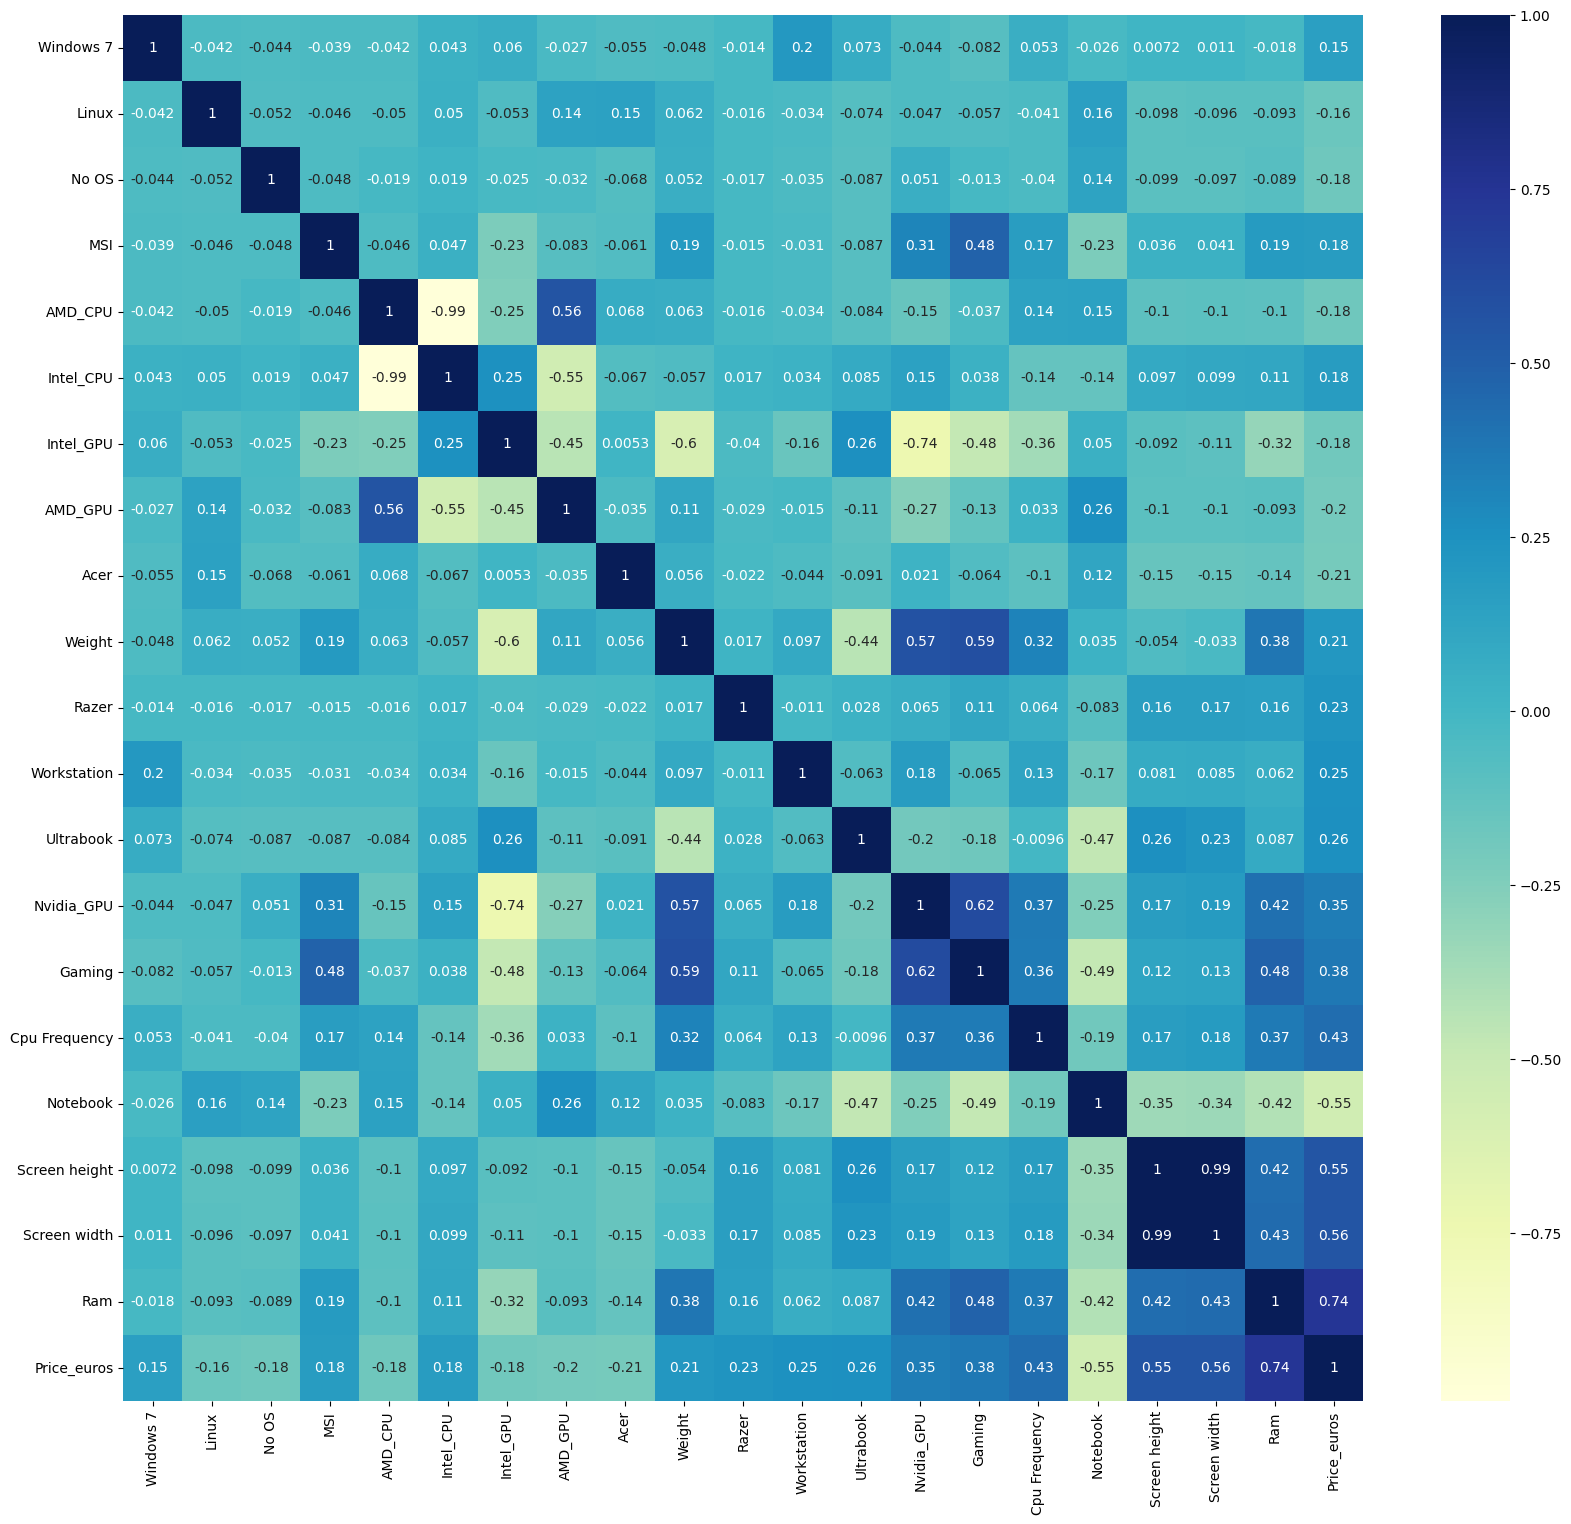

In [ ]:
plt.figure(figsize=(20, 18))
sns.heatmap(limited_df.corr(), annot=True, cmap="YlGnBu")

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = limited_df.drop("Price_euros", axis=1), limited_df["Price_euros"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
forest = RandomForestRegressor()

forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test_scaled, y_test)

0.7846552754936411

In [ ]:
y_pred = forest.predict(X_test_scaled)

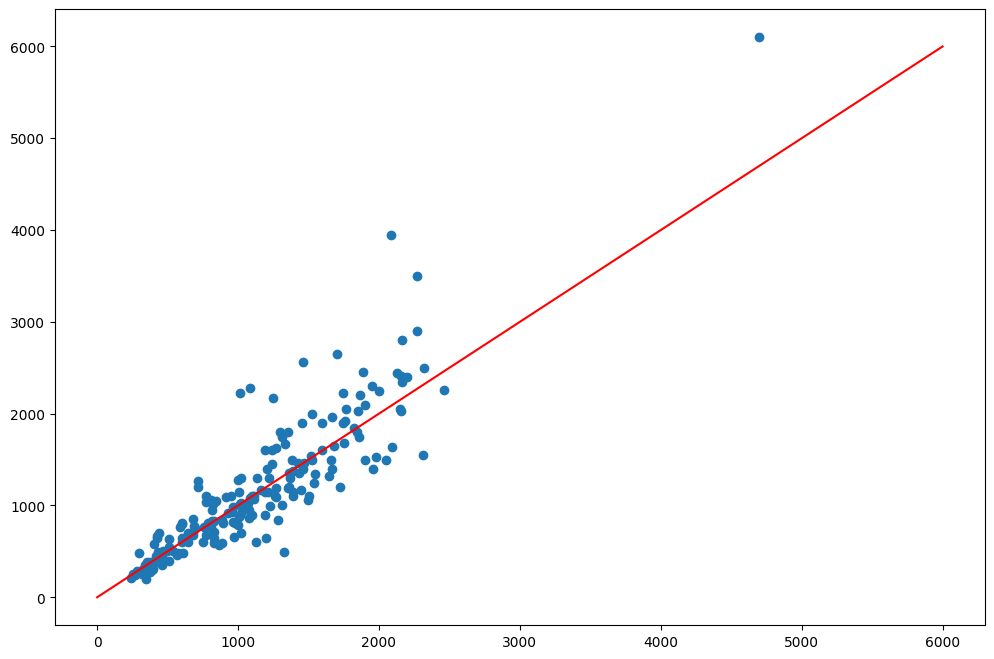

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test)
plt.plot(range(0, 6000), range(0, 6000), c="red")

In [ ]:
X_new_scaled = scaler.transform([X_test.iloc[0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
forest.predict(X_new_scaled)

array([1023.64713333])

In [ ]:
y_test.iloc[0]

705.15